In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
import json

In [28]:
# Parameters for matplotlib (these should be the same as the ones used for SHD)
fontsize = 20
matplotlib.rcParams.update({
    "font.size": fontsize,
    "axes.titlesize": fontsize,
    "axes.labelsize": fontsize, #* 2,
    "xtick.labelsize": fontsize,
    "ytick.labelsize": fontsize,
    "xtick.major.size": fontsize * .8,
    "ytick.major.size": fontsize * .8,
    "legend.fontsize": fontsize-5,
    #"font.family": "Times new Roman",
    "figure.dpi": 100,
    "savefig.dpi": 300,
    #"text.usetex": True,
    "path.simplify": True,
    "figure.figsize": (8, 6)
})

plt.rcParams["figure.facecolor"] = "w"


# Class to deal in an easy way with number of digits in colorbars (used for ULs and sigma maps)
class FormatScalarFormatter(matplotlib.ticker.ScalarFormatter):
            def __init__(self, fformat="%1.1f", offset=True, mathText=True):
                self.fformat = fformat
                matplotlib.ticker.ScalarFormatter.__init__(self,useOffset=offset,
                                                        useMathText=mathText)
            def _set_format(self):
                self.format = self.fformat
                if self._useMathText:
                    #self.format = '$%s$' % matplotlib.ticker._mathdefault(self.format)
                    self.format = '$%s$' % ('\\mathdefault{%s}' % self.format)

## Tania's landscape plot

In [3]:
tania_SGWB = "./astro_landscape_tania_webplotdigitalizer/"
file_list = os.listdir(tania_SGWB)
print(file_list)
file_dict = {file[:-4]: tania_SGWB+file for file in file_list}
SGWB_list =['BNS', 'core_collapse_BH','r_modes','BH_ringdown', 'magnetars','supernovas_bar_modes',\
                'magnetars2', 'core_collapse_NS']

['BNS.txt', 'astro_landscape_from_webplotdigitalizer.ipynb', 'core_collapse_BH.txt', 'regimbau.svg', 'regimbau.pdf', 'r_modes.txt', 'BH_ringdown.txt', '.ipynb_checkpoints', 'magnetars.txt', 'supernovas_bar_modes.txt', 'magnetars2.txt', 'READme.txt', 'core_collapse_NS.txt']


In [4]:
SGWB_labels = {'BNS':"BNS", 'core_collapse_BH':"core-collapse to BH",'r_modes':"r-modes",\
               'BH_ringdown': "BH ringdown", 'magnetars':"magnetars",'supernovas_bar_modes':"supernovas + bar modes",\
                'magnetars2':"magnetars", 'core_collapse_NS':"core-collapse to NS"}
SGWB_colors = {'BNS':"blue", 'core_collapse_BH':"darkviolet",'r_modes':"green",\
               'BH_ringdown': "magenta", 'magnetars':"red",'supernovas_bar_modes':"orange",\
                'magnetars2':"red", 'core_collapse_NS':"brown"}

#SGWB_linestyles = {'planck':"solid", 'SKA':"dashed",'LVC-O3': "solid",'ET': "dotted",\
#                   'AION': "dashed",'A+':"dashed", 'cassini':"solid", 'normal-modes':"solid",\
#                   'LISA': "dashed", 'binary-resonance': "dashed",'PPTA': "solid"}

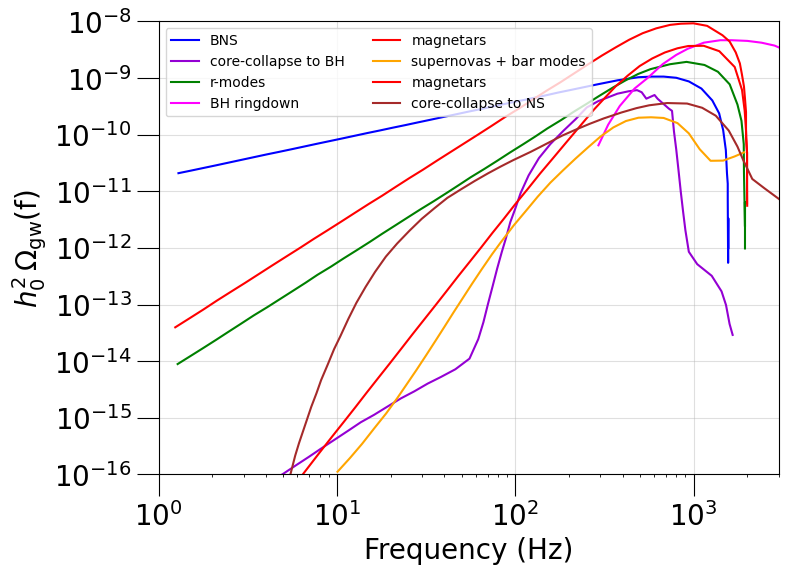

In [5]:
h0=0.7

for k in SGWB_list:
    f, Om = np.transpose(np.loadtxt(file_dict[k], skiprows=1))
    plt.loglog(np.sort(f), h0**2*Om[np.argsort(f)], label = SGWB_labels[k], color = SGWB_colors[k])#, linestyle=detector_linestyles[k])
    
plt.xlim(1, 3000)
plt.ylim(1e-16,1e-8)
plt.yticks(np.logspace(-16,-8,9))

plt.xlabel("Frequency (Hz)")
plt.ylabel(r"$h_{0}^{2}\,\Omega_{\rm gw}$(f)")
plt.grid(alpha = 0.4)
#plt.legend(ncol = 1, bbox_to_anchor = (1.55, 0.5), loc = "center right")
plt.legend(ncol = 2, loc = "upper left", fontsize = 10)
#plt.savefig("./Bound_SGWB_landscape.pdf", bbox_inches = "tight")
plt.show()

## My landscape plot

In [6]:
SGWB_labels = {'BNS':"BNS", 'core_collapse_BH':"core-collapse to BH",'r_modes':"r-modes",\
               'BH_ringdown': "BH ringdown", 'magnetars':"magnetars",'supernovas_bar_modes':"supernovas + bar modes",\
                'magnetars2':"magnetars", 'core_collapse_NS':"core-collapse to NS"}
SGWB_colors = {'BNS':"blue", 'core_collapse_BH':"purple",'r_modes':"green",\
               'BH_ringdown': "magenta", 'magnetars':"red",'supernovas_bar_modes':"orange",\
                'magnetars2':"red", 'core_collapse_NS':"brown"}
SGWB_linestyles = {'BNS':"solid", 'core_collapse_BH':"dashdot",'r_modes':"dashed",\
                   'BH_ringdown': "dashdot", 'magnetars':"solid",'supernovas_bar_modes':"dotted",\
                   'magnetars2':"dashed", 'core_collapse_NS':"dotted"}

### Select SGWB from Tania's ones

In [7]:
SGWB_list_Tania =['core_collapse_BH', 'supernovas_bar_modes',\
                  'core_collapse_NS']#,'BH_ringdown']

### Prepare CBC from GWTC-3 and my magnetars ad r-modes

In [8]:
path_GWTC3 = "./GWTC-3_analyses_Stochastic/analyses/Stochastic/"
bbh_path = path_GWTC3 + "omegaGW_bbh.json"
bns_path = path_GWTC3 + "omegaGW_bns.json"
bhns_path = path_GWTC3 + "omegaGW_nsbh.json"

In [9]:
with open(bbh_path) as bbh_file:
    bbhData=json.load(bbh_file)
bbhBackgrounds = np.array(bbhData['OmgGW'])
bbh_freqs = np.array(bbhData['freqs'])
bbh_omg_05 = np.quantile(bbhBackgrounds,0.05,axis=0)
bbh_omg_50 = np.quantile(bbhBackgrounds,0.50,axis=0)
bbh_omg_95 = np.quantile(bbhBackgrounds,0.95,axis=0)
bbh_omg_05_25Hz = np.interp(25.,bbh_freqs,bbh_omg_05)
bbh_omg_50_25Hz = np.interp(25.,bbh_freqs,bbh_omg_50)
bbh_omg_95_25Hz = np.interp(25.,bbh_freqs,bbh_omg_95)

In [10]:
with open(bns_path) as bns_file:
    bnsData=json.load(bns_file)

bnsBackgrounds = np.array(bnsData['OmgGW'])
bns_freqs = np.array(bnsData['freqs'])

# Compute 5%, 50%, and 95% quantiles at every frequency
bns_omg_05 = np.quantile(bnsBackgrounds,0.05,axis=0)
bns_omg_50 = np.quantile(bnsBackgrounds,0.50,axis=0)
bns_omg_95 = np.quantile(bnsBackgrounds,0.95,axis=0)

# Get bounds on BNS background at 25Hz
bns_omg_05_25Hz = np.interp(25.,bns_freqs,bns_omg_05)
bns_omg_50_25Hz = np.interp(25.,bns_freqs,bns_omg_50)
bns_omg_95_25Hz = np.interp(25.,bns_freqs,bns_omg_95)

In [11]:
with open(bhns_path) as bhns_file:
    nsbhData=json.load(bhns_file)

nsbhBackgrounds = np.array(nsbhData['OmgGW'])
nsbh_freqs = np.array(nsbhData['freqs'])
nsbh_omg_05 = np.quantile(nsbhBackgrounds,0.05,axis=0)
nsbh_omg_50 = np.quantile(nsbhBackgrounds,0.50,axis=0)
nsbh_omg_95 = np.quantile(nsbhBackgrounds,0.95,axis=0)
nsbh_omg_05_25Hz = np.interp(25.,nsbh_freqs,nsbh_omg_05)
nsbh_omg_50_25Hz = np.interp(25.,nsbh_freqs,nsbh_omg_50)
nsbh_omg_95_25Hz = np.interp(25.,nsbh_freqs,nsbh_omg_95)

In [12]:
# Total number of spectra generated
n_bns = bnsBackgrounds.shape[0]
n_nsbh = nsbhBackgrounds.shape[0]
n_bbh = bbhBackgrounds.shape[0]

# Get quantiles describing total Omega(f)
net_05 = np.zeros(bns_freqs.size)
net_50 = np.zeros(bns_freqs.size)
net_95 = np.zeros(bns_freqs.size)
for i in range(bns_freqs.size):

    # At each frequency, draw many combinations of OmegaBBH+OmegaBNS+OmegaNSBH 
    bns = bnsBackgrounds[np.random.choice(range(0,n_bns),size=10000,replace=True),i]
    nsbh = nsbhBackgrounds[np.random.choice(range(0,n_nsbh),size=10000,replace=True),i]
    bbh = bbhBackgrounds[np.random.choice(range(0,n_bbh),size=10000,replace=True),i]

    # Compute an ensemble of possible totals
    total = bns+bbh+nsbh

    # Record quantiles
    net_05[i] = np.quantile(total,0.05)
    net_50[i] = np.quantile(total,0.50)
    net_95[i] = np.quantile(total,0.95)

# Compute and store total background at 25Hz
net_05_25Hz = np.interp(25.,bbh_freqs,net_05)
net_50_25Hz = np.interp(25.,bbh_freqs,net_50)
net_95_25Hz = np.interp(25.,bbh_freqs,net_95)

In [13]:
print(bbh_freqs[0], bbh_freqs[-1], len(bbh_freqs))
print(bns_freqs[0], bns_freqs[-1], len(bns_freqs))
print(nsbh_freqs[0], nsbh_freqs[-1], len(nsbh_freqs))

10.0 3162.2776601683795 200
10.0 3162.2776601683795 200
10.0 3162.2776601683795 200


In [14]:
from scipy.interpolate import interp1d

flag = bbh_freqs<=100

new_freqs = np.logspace(0,1)#np.log10(np.max(bbh_freqs[flag])))
bbh_omg_50_int = interp1d(bbh_freqs[flag], bbh_omg_50[flag], fill_value="extrapolate", kind="cubic")(new_freqs)
bns_omg_50_int = interp1d(bbh_freqs[flag], bns_omg_50[flag], fill_value="extrapolate", kind="cubic")(new_freqs)
nsbh_omg_50_int = interp1d(bbh_freqs[flag], nsbh_omg_50[flag], fill_value="extrapolate", kind="cubic")(new_freqs)
net_50_int = interp1d(bbh_freqs[flag], net_50[flag], fill_value="extrapolate", kind="slinear")(new_freqs)

In [15]:
data_magnetars = np.load("magnetars_GW_negligible_B1e11T_e5e-4_for_draft.npz")
data_r_modes = np.load("r_modes_K_m1.25_fmax_1191_for_draft.npz")
#data_r_modes = np.load("r_modes_K_m1.25_fmax_2000_for_draft.npz")

### Plot everything at once

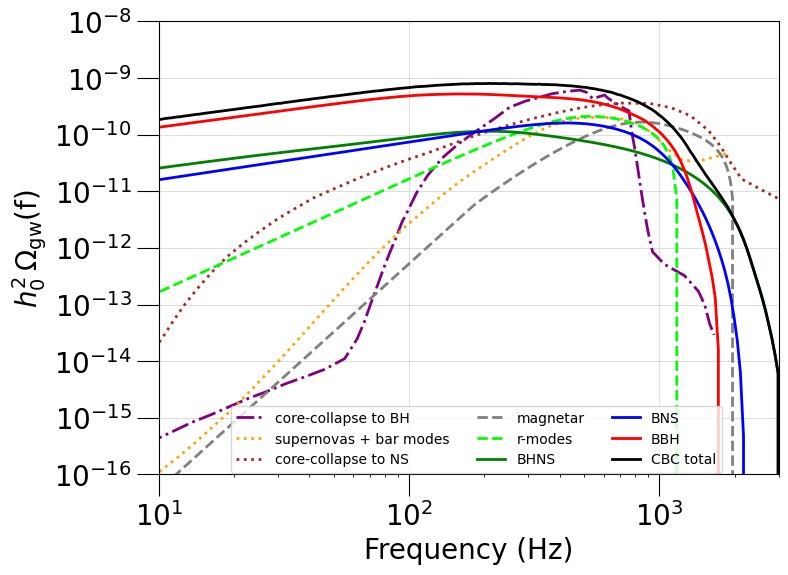

In [55]:
h0=0.7

for k in SGWB_list_Tania:
    f, Om = np.transpose(np.loadtxt(file_dict[k], skiprows=1))
    plt.loglog(np.sort(f), h0**2*Om[np.argsort(f)], label = SGWB_labels[k], color = SGWB_colors[k],\
               linewidth = 2, linestyle = SGWB_linestyles[k])

h0=0.679

#plt.loglog(new_freqs, bbh_omg_50_int, color = "red", linewidth = 2)
#plt.loglog(new_freqs, bns_omg_50_int, color = "blue", linewidth = 2)
#plt.loglog(new_freqs, nsbh_omg_50_int, color = "green", linewidth = 2)
#plt.loglog(new_freqs, net_50_int, color = "black", linewidth = 2)   
plt.loglog(data_magnetars["freqs"], data_magnetars["Om_mag"]*h0**2, label = "magnetar", linewidth = 2,\
           color = "gray", linestyle="dashed")
plt.loglog(data_r_modes["freqs"], data_r_modes["Om_r_mode"]*h0**2/100, label = "r-modes", linewidth = 2,\
           color = "lime", linestyle="dashed")

plt.loglog(nsbh_freqs, nsbh_omg_50*h0**2, color = "green", label = "BHNS", linewidth = 2)
plt.loglog(bns_freqs, bns_omg_50*h0**2, color = "blue", label = "BNS", linewidth = 2)
plt.loglog(bbh_freqs, bbh_omg_50*h0**2, color = "red", label = "BBH", linewidth = 2)
plt.loglog(bns_freqs, net_50*h0**2, color = "black", label = "CBC total", linewidth = 2)   
    
plt.xlim(10, 3000)
plt.ylim(1e-16,1e-8)
plt.yticks(np.logspace(-16,-8,9))

plt.xlabel("Frequency (Hz)")
plt.ylabel(r"$h_{0}^{2}\,\Omega_{\rm gw}$(f)")
plt.grid(alpha = 0.4)
#plt.legend(ncol = 1, bbox_to_anchor = (1.6, 0.5), loc = "center right")
plt.legend(ncol = 3, bbox_to_anchor = (0.105, 0.1675), fontsize =10)
plt.savefig("./Astro_SGWB_landscape.pdf", bbox_inches = "tight")
plt.show()